In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
# # user IDs Count
# uid_csv = "Output\\uid_count.csv"
# df = pd.read_csv(uid_csv)
# plt.bar(x=df['uid'],
#         height=df['count'])
# plt.xticks(rotation = 90)

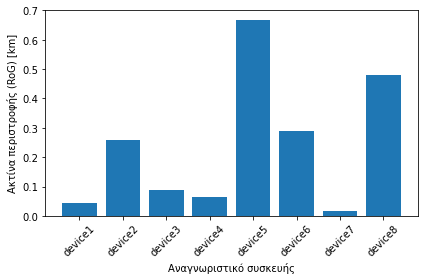

In [5]:
# Radius of gyration
in_csv = "Output\\radius_of_gyration.csv"
df = pd.read_csv(in_csv)
fig = plt.figure()
plt.bar(x=df.iloc[:,0],
        height=df.iloc[:,1])
plt.xticks(rotation = 45)
# fig.suptitle('Ακτίνα περιστροφής ανά συσκευή', fontsize=15)
plt.xlabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.ylabel('Ακτίνα περιστροφής (RoG) [km]', fontsize=10)
plt.tight_layout()
plt.savefig(in_csv.replace("Output","Plots").replace("csv","png"), dpi = 500)

            K = 2     K = 5    K = 10
uid                                  
device1  0.006156  0.009839  0.010244
device2  0.326607  0.455353  0.427758
device3  0.008643  0.007174  0.007066
device4  0.025215  0.042611  0.048456
device5  0.066453  0.452976  0.613608


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

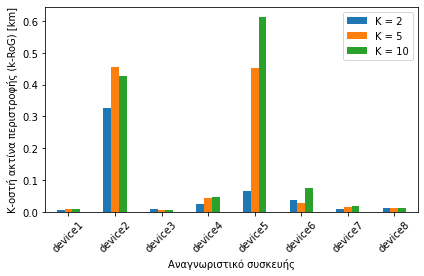

In [6]:
import os
in_csv = "Output\\k_rog"

fig = plt.figure()
df = pd.read_csv(os.path.join(in_csv,"2k_radius_of_gyration.csv"))
for x in [5,10]:
    df1 = pd.read_csv(os.path.join(in_csv,str(x)+"k_radius_of_gyration.csv"))
    df[str(x)+"k_radius_of_gyration"] = df1[str(x)+"k_radius_of_gyration"]
# print(df.head())
df = df.set_index('uid')
for x in range(22):
    df = df.rename(columns={str(x)+"k_radius_of_gyration" : "K = "+str(x)})
print(df.head())
fig = plt.figure()

# write to file
df.to_csv("Output\\out_k_rog_combined.csv")

df.plot.bar()
plt.xlabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.ylabel('Κ-οστή ακτίνα περιστροφής (k-RoG) [km]', fontsize=10)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.savefig(in_csv.replace("Output","Plots")+"_comparison.png", dpi = 500)

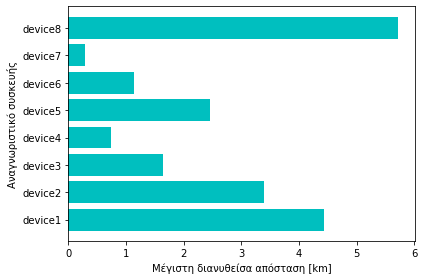

In [7]:
# Max distance traveled
in_csv = "Output\\max_distance.csv"
df = pd.read_csv(in_csv)
fig = plt.figure()
plt.barh(y=df.iloc[:,0],
        width=df.iloc[:,1], color = 'c')
# plt.xticks(rotation = 45)
plt.ylabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.xlabel('Μέγιστη διανυθείσα απόσταση [km]', fontsize=10)
plt.tight_layout()
plt.savefig(in_csv.replace("Output","Plots").replace("csv","png"), dpi = 500)

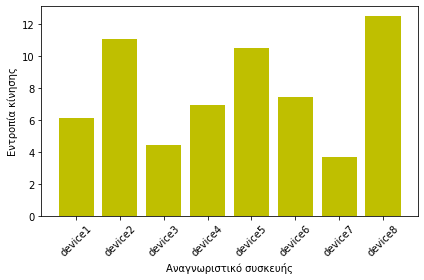

In [8]:
in_csv = "Output\\random_entropy.csv"
df = pd.read_csv(in_csv)
fig = plt.figure()
plt.bar(x=df.iloc[:,0],
        height=df.iloc[:,1], color = 'y')
plt.xticks(rotation = 45)
plt.xlabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.ylabel('Εντροπία κίνησης', fontsize=10)
plt.tight_layout()
plt.savefig(in_csv.replace("Output","Plots").replace("csv","png"), dpi = 500)

       uid  number_of_locations
0  device1                   71
1  device2                 2114
2  device3                   22
3  device4                  124
4  device5                 1457
5  device6                  173
6  device7                   13
7  device8                 5711


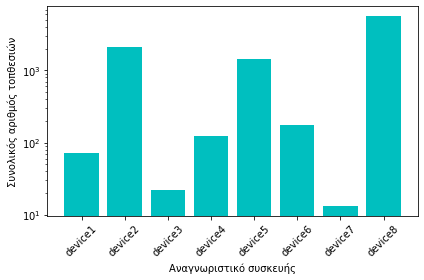

In [19]:
in_csv = "Output\\number_of_locations.csv"
df = pd.read_csv(in_csv)
print(df.head(10))
fig = plt.figure()
plt.bar(x=df.iloc[:,0],
        height=df.iloc[:,1], color = 'c')
plt.xticks(rotation = 45)
plt.xlabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.ylabel('Συνολικός αριθμός τοπθεσιών [log]', fontsize=10)
plt.yscale('log')
# plt.yscale('log')
plt.tight_layout()
plt.savefig(in_csv.replace("Output","Plots").replace("csv","png"), dpi = 500)

In [1]:
# Logarithmic scale

csv_tot_loc = "Output\\number_of_locations.csv"
csv_moving = "Output\\moving_uid_count.csv"
output_path = "Plots\\moving_number_loc_comparison.png"
fig = plt.figure()
df = pd.read_csv(csv_tot_loc)
df1 = pd.read_csv(csv_moving)

df['Number of Moving'] = df1['count']
df = df.rename(columns={"number_of_locations" : "Αριθμός διακριτών τοποθεσιών"})
df = df.rename(columns={"Number of Moving" : "Αριθμός καταγραφών κατά τη μετακίνηση"})
print(df.head())
fig = plt.figure()
df = df.set_index('uid')
df.plot.bar()
plt.xlabel('Αναγνωριστικό συσκευής', fontsize=10)
plt.ylabel('log(N)', fontsize=10)
plt.tight_layout()
plt.yscale('log')
plt.xticks(rotation = 45)
plt.savefig(output_path, dpi = 500)

NameError: name 'plt' is not defined

In [13]:
csv_tot_loc = "Output\\frequency_rank_work_hours_top3.csv"
df = pd.read_csv(csv_tot_loc)
frequency_rank = folium.Map(location=[35.5,24.0], zoom_start = 11)
for index, row in df.iterrows():
    folium.Marker( location=[ row[2], row[3] ], fill_color='#43d9de', radius=8, popup=row[0]).add_to( frequency_rank )
frequency_rank